In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

In [16]:
data=pd.read_csv('F:\coursera_,ml\machine-learning-ex2\ex2\ex2data1.txt',header=None)

In [17]:
data_x=data.iloc[:,0:2]
data_y=data.iloc[:,2]

In [18]:
x=data_x.as_matrix()
y=data_y.as_matrix()

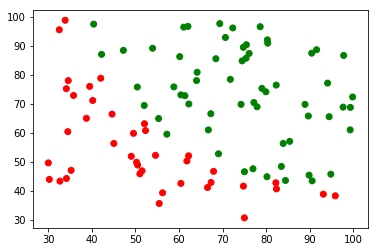

In [19]:
c=['red' if l==0 else 'green' for l in y]
plt.scatter(x[:,0],x[:,1],color=c)
plt.show()

In [20]:
x1=np.c_[np.ones((len(x),1)),x]
y=y.reshape((len(y),1))

In [21]:
t=np.ones((3,1))
alpha=0.01
j_history=np.zeros((10000,1))

In [22]:
def cost(x,y,t):
    h=1/(1+np.exp(-1*np.dot(x,t)))
    j=(-1/len(y))*(np.sum(y*np.log(h)+(1-y)*np.log(1-h)))
    return j

In [23]:
def scaling(x):
    a=np.sum(x)/len(x)
    s=np.std(x)
    x=(x-a)/s
    return x

In [24]:
for i in range(1,3):
    x1[:,i]=scaling(x1[:,1])

In [25]:
for i in range(10000):
    h=1/(1+np.exp(-1*np.dot(x1,t)))
    q=h-y
    t=t-(alpha/len(y))*(np.dot(x1.T,q))
    j=cost(x1,y,t)
    j_history[i]=j

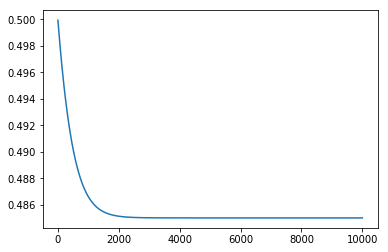

In [26]:
plt.plot(np.arange(10000),j_history)
plt.show()

In [27]:
pre=1/(1+np.exp(-1*np.dot(x1,t)))

In [28]:
for i in range(len(pre)):
    if pre[i]>=0.5:
        pre[i]=1
    else:
        pre[i]=0

In [29]:
c=0
for i in range(len(y)):
    if pre[i]==y[i]:
        c=c+1

In [30]:
acc=(c/len(y))*100
acc

80.0